# PART 3
## Normalize data

scran normalization: running normalzation on each cell type separately

- **INPUT:**
    - ```counts_cf_ctf_gf_sf.RData``` 
    - ```anno_cells_cf_ctf_gf_sf.RData```
    - ```anno_samples_cf_ctf_gf_sf.RData```
    - ```anno_genes_cf_ctf_gf_sf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory
    
    
- **OUTPUT:**

    -  ```counts_norm.mtx``` 
    -  ```anno_cells_norm.txt``` 
    -  ```anno_samples_norm.txt``` 
    -  ```anno_genes_norm.txt``` 

In [3]:
library(ggplot2)
library(SingleCellExperiment)
library(scran)
library(scater)
library(Matrix)

In [4]:
# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")

# BiocManager::install(c("SingleCellExperiment","scran","scater"))

In [5]:
path_to_additional_files="/work/project/ladcol_006/analysis/AMLniche/comparativeAnalysis/scripts_for_paper/datasets/AML_healthy/additional_input_files/"

In [9]:
# load cell relabelling file
print("load cell_relabelling")
file="cell_relabelling.csv"
cell_relabelling <- read.csv(file = paste(path_to_additional_files, file, sep="")
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

[1] "load cell_relabelling"
'data.frame':	40 obs. of  9 variables:
 $ cell_type_original    : chr  "B" "CD10+ B cells" "CD20+ B cells" "ProB" ...
 $ cell_type             : chr  "B" "B" "B" "B" ...
 $ source                : chr  "van Galen et al., 2019" "Oetjen et al., 2018" "Oetjen et al., 2018" "van Galen et al., 2019" ...
 $ cell_type_color       : chr  "green" "green" "green" "green" ...
 $ cell_type_color_hex   : chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
 $ cell_type_shape       : int  12 12 12 12 13 13 13 13 13 13 ...
 $ cell_subtype          : chr  "B" "B" "B" "B" ...
 $ cell_subtype_color    : chr  "green" "green" "green" "green" ...
 $ cell_subtype_color_hex: chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
NULL


In [10]:
# load counts
print("load counts")
load("counts_cf_ctf_gf_sf.RData")
print("dim(counts_cf_ctf_gf_sf)")
print(dim(counts_cf_ctf_gf_sf))

# load cell annotation
print("load cell annotation")
load("anno_cells_cf_ctf_gf_sf.RData")
print("str(anno_cells_cf_ctf_gf_sf)")
print(str(anno_cells_cf_ctf_gf_sf))

# load sample annotation
print("load sample annotation")
load("anno_samples_cf_ctf_gf_sf.RData")
print("str(anno_samples_cf_ctf_gf_sf)")
print(str(anno_samples_cf_ctf_gf_sf))

# load gene annotation
print("load gene annotation")
load("anno_genes_cf_ctf_gf_sf.RData")
print("str(anno_genes_cf_ctf_gf_sf)")
print(str(anno_genes_cf_ctf_gf_sf))

[1] "load counts"
[1] "dim(counts_cf_ctf_gf_sf)"
[1] 12485 74583
[1] "load cell annotation"
[1] "str(anno_cells_cf_ctf_gf_sf)"
'data.frame':	74583 obs. of  33 variables:
 $ cell_ID                       : chr  "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG" ...
 $ cell_type_original            : chr  "GMP" "GMP-like" "Prog-like" "ProMono-like" ...
 $ sample_ID                     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
 $ malignant                     : logi  FALSE TRUE TRUE TRUE TRUE TRUE ...
 $ patient_ID                    : chr  "AML1012" "AML1012" "AML1012" "AML1012" ...
 $ dataset                       : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                        : chr  "F" "F" "F" "F" ...
 $ age                           : int  32 32 32 32 32 32 32 32 32 32 ...
 $ health_status                 : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control               : chr  "cas

In [11]:
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color_hex[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### Process data 

In [12]:
# create SingleCellExperiment object
original_sce <- SingleCellExperiment(
        assays = list(counts = as.matrix(counts_cf_ctf_gf_sf))
    ,colData = anno_cells_cf_ctf_gf_sf
)

In [13]:
# normalize, scran normalization with quickCluster
original_sce <- logNormCounts(original_sce
                              ,log = FALSE
                              )

### visualze 

[1] "construct pseudo bulks for cell types"
[1] "str(counts_pseudobulkCellType)"
'data.frame':	12485 obs. of  193 variables:
 $ HSPC_AML1012-D0: num  0.0554 0 0 0 0.0171 ...
 $ Mono_AML1012-D0: num  0.1221 0 0.0033 0.0066 0.0231 ...
 $ DC_AML1012-D0  : num  0.053 0 0 0 0.0303 ...
 $ Ery_AML1012-D0 : num  0 0 0 0 0 0 0 0.04 0 0.08 ...
 $ T_AML1012-D0   : num  0 0 0 0 0 ...
 $ B_AML210A-D0   : num  0.0476 0 0 0 0 ...
 $ Mono_AML210A-D0: num  0.06838 0 0.00855 0 0.03419 ...
 $ DC_AML210A-D0  : num  0.07477 0 0 0 0.00935 ...
 $ Ery_AML210A-D0 : num  0.0769 0 0 0 0 ...
 $ HSPC_AML210A-D0: num  0.0863 0 0.0288 0 0.0647 ...
 $ T_AML210A-D0   : num  0.0787 0 0 0 0 ...
 $ HSPC_AML328-D0 : num  0.17633 0.00232 0.03016 0.01624 0.06032 ...
 $ T_AML328-D0    : num  0.0825 0 0 0 0.0412 ...
 $ Mono_AML328-D0 : num  0.08494 0 0.00772 0 0.01931 ...
 $ DC_AML328-D0   : num  0.1724 0.0172 0.0172 0 0.0345 ...
 $ Ery_AML328-D0  : num  0.0208 0 0.0208 0 0.0833 ...
 $ B_AML328-D0    : num  0.125 0 0 0 0 0 0 

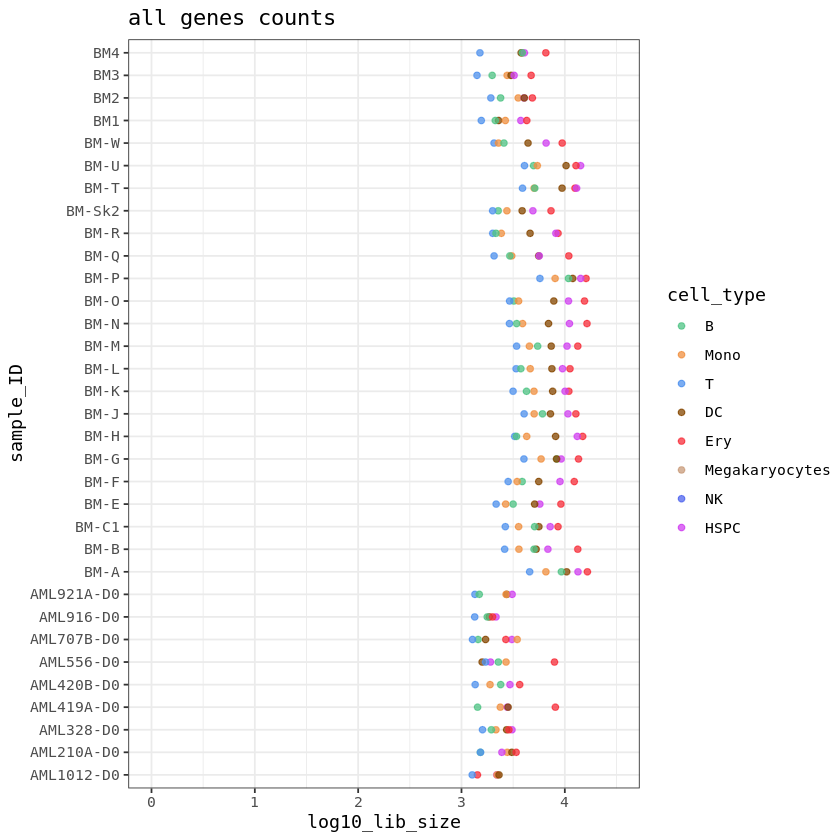

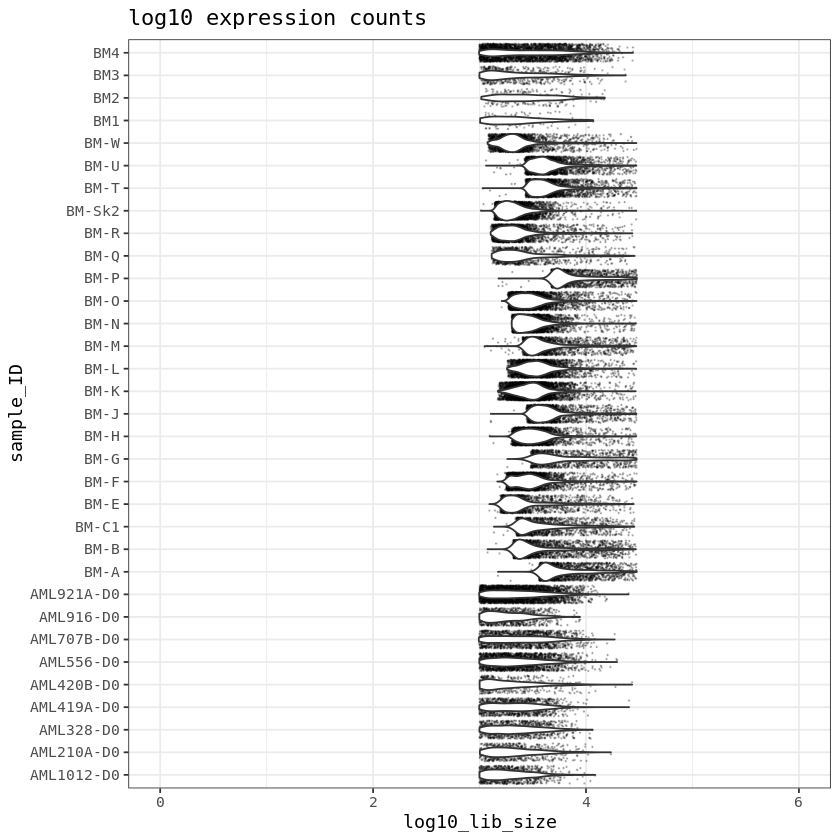

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  1.72 2.3 1.76 2.36 1.85 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


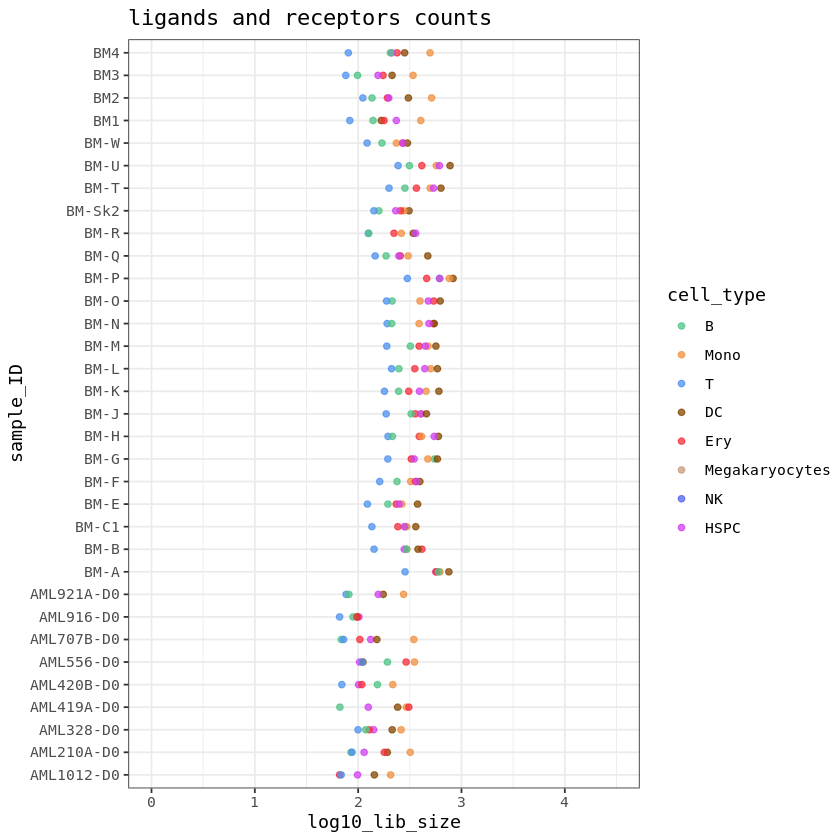

[1] "str(counts_pseudobulkCellType)"
'data.frame':	12485 obs. of  193 variables:
 $ HSPC_AML1012-D0: num  0.0948 0 0 0 0.0342 ...
 $ Mono_AML1012-D0: num  0.2822 0 0.00813 0.01453 0.05058 ...
 $ DC_AML1012-D0  : num  0.0782 0 0 0 0.0542 ...
 $ Ery_AML1012-D0 : num  0 0 0 0 0 ...
 $ T_AML1012-D0   : num  0 0 0 0 0 ...
 $ B_AML210A-D0   : num  0.165 0 0 0 0 ...
 $ Mono_AML210A-D0: num  0.10066 0 0.00621 0 0.03506 ...
 $ DC_AML210A-D0  : num  0.0486 0 0 0 0.0225 ...
 $ Ery_AML210A-D0 : num  0.231 0 0 0 0 ...
 $ HSPC_AML210A-D0: num  0.101 0 0.0361 0 0.1346 ...
 $ T_AML210A-D0   : num  0.211 0 0 0 0 ...
 $ HSPC_AML328-D0 : num  0.20242 0.00138 0.04048 0.03043 0.07896 ...
 $ T_AML328-D0    : num  0.212 0 0 0 0.112 ...
 $ Mono_AML328-D0 : num  0.1969 0 0.0109 0 0.0356 ...
 $ DC_AML328-D0   : num  0.2924 0.0155 0.0192 0 0.0224 ...
 $ Ery_AML328-D0  : num  0.028 0 0.0454 0 0.1982 ...
 $ B_AML328-D0    : num  0.0968 0 0 0 0 ...
 $ Mono_AML419A-D0: num  0.26692 0.0123 0.01511 0.00249 0.05113 ...

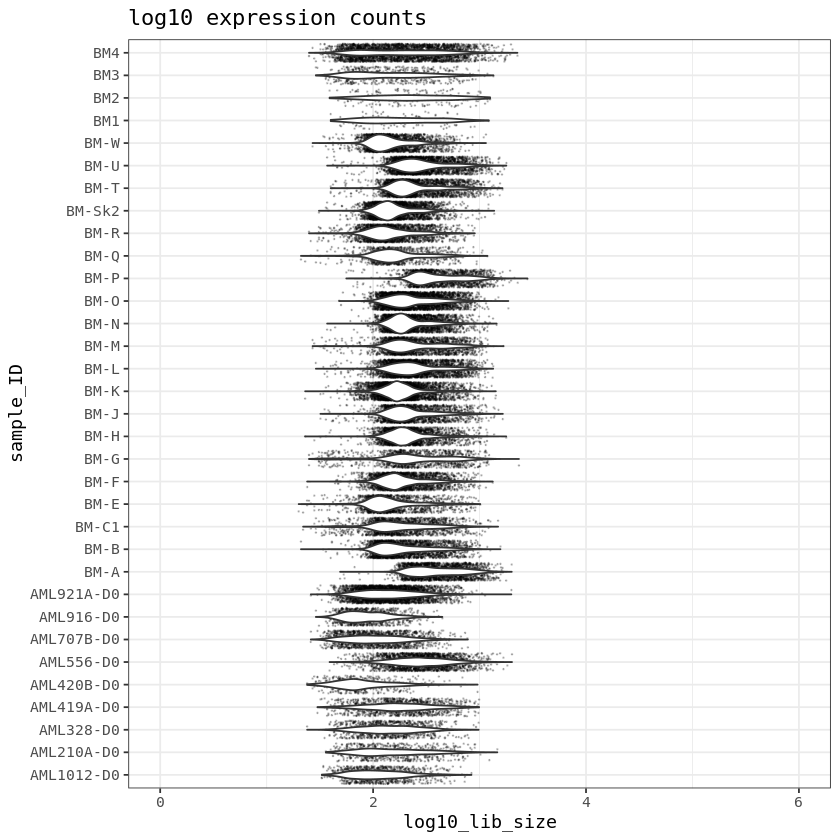

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  3.61 3.61 3.61 3.61 3.61 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


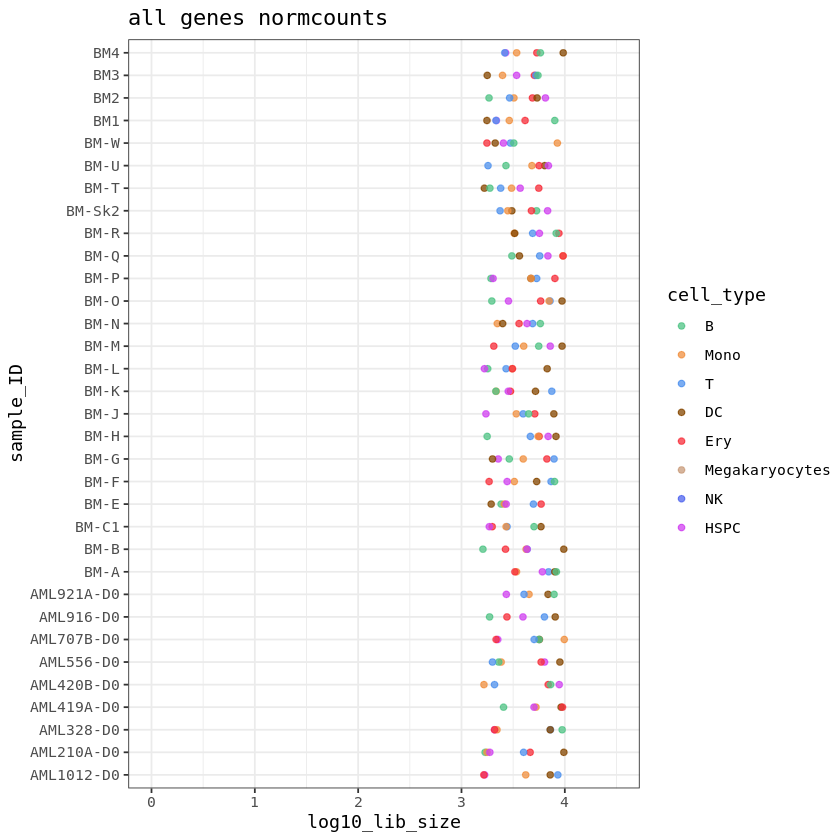

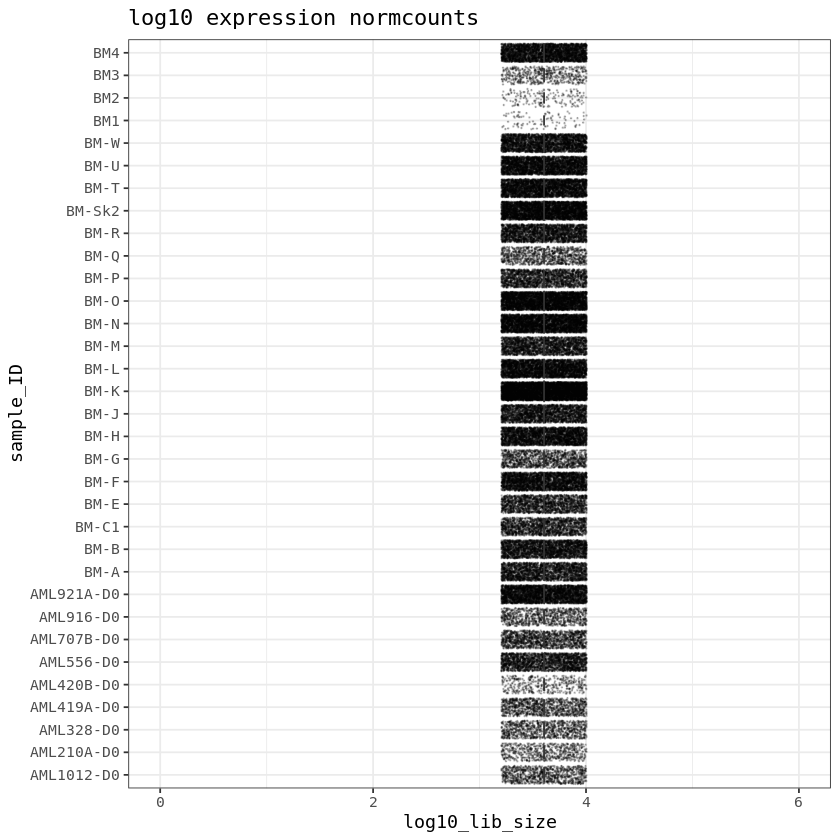

[1] "visualize expression after gene filter"
'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  2.22 2.28 2.14 2.65 2.3 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


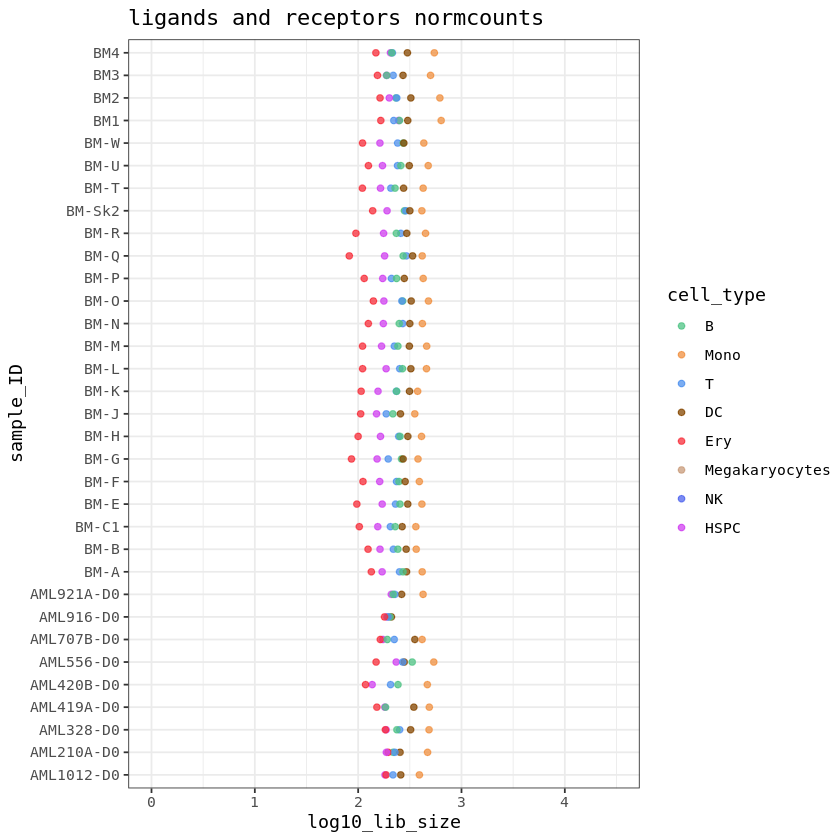

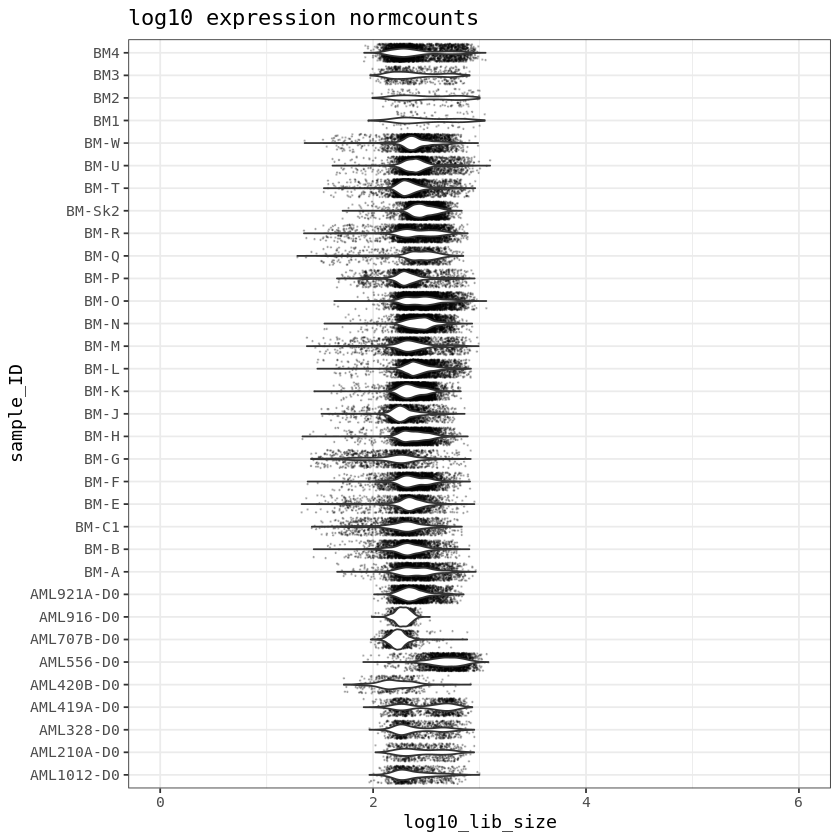

In [14]:
print("construct pseudo bulks for cell types")
for(counts_type in c("counts"
                ,"normcounts")
){
  cell_type_IDs <- unique(anno_cells_cf_ctf_gf_sf$cell_type_ID)
  counts_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(original_sce@assays@data@listData[[counts_type]])
                                                    ,ncol = length(cell_type_IDs)
  )
  )
  i <- 1
  for(cell_type_ID in cell_type_IDs){
    #print(cell_type_ID)
    
    idx_cell_type_ID <- anno_cells_cf_ctf_gf_sf$cell_type_ID == cell_type_ID
    
    if(sum(idx_cell_type_ID) == 0){
      counts_pseudobulkCellType[,i] <- 0
    } else if( sum(idx_cell_type_ID) == 1){
      counts_pseudobulkCellType[,i] <- original_sce@assays@data@listData[[counts_type]][,idx_cell_type_ID]
    } else {
      counts_pseudobulkCellType[,i] <- rowMeans(original_sce@assays@data@listData[[counts_type]][,idx_cell_type_ID])
    }
    
    i <- i+1
  }
  colnames(counts_pseudobulkCellType) <- cell_type_IDs
  rownames(counts_pseudobulkCellType) <- rownames(original_sce@assays@data@listData[[counts_type]])
  print("str(counts_pseudobulkCellType)")
  print(str(counts_pseudobulkCellType))
  
  # visualize expression in pseudo sorted bulk
  print("visualize expression in pseudo-bulk cell type")
  for(genes_type in c("all genes"
                      ,"ligands and receptors")){
    ifelse(genes_type == "all genes"
           ,idx_genes <- rep(T,nrow(anno_genes_cf_ctf_gf_sf))
           ,idx_genes <- anno_genes_cf_ctf_gf_sf$isLigand | anno_genes_cf_ctf_gf_sf$isReceptor
    )
    
    my_sampes <- sub("_.*", "", colnames(counts_pseudobulkCellType))
    df <- data.frame(log10_lib_size = log10(colSums(counts_pseudobulkCellType[idx_genes,]) +1)
                     ,sample_ID = sub(".*_"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
                     ,cell_type = sub("_.*"
                                      ,""
                                      ,colnames(counts_pseudobulkCellType)
                     )
    )
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                      ,color = cell_type
                 )
    ) +
      geom_jitter(height = NULL
                  ,width = 0
                  ,alpha = 0.75) +
      ggtitle(paste(genes_type
                    ,counts_type)) +
      coord_flip() +
      ylim(c(0,4.5)) +
      scale_color_manual(values = color_celltype)+
      theme_bw()
    )
    
    # visualize expression after gene filter
    print("visualize expression after gene filter")
    df <- data.frame(log10_lib_size = log10(colSums(original_sce@assays@data@listData[[counts_type]][idx_genes,]) +1)
                     ,sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
    )
    print(str(df))
    
    print(ggplot(data = df
                 ,aes(x = sample_ID
                      ,y = log10_lib_size
                 )
    ) +
      geom_jitter(height = NULL
                  ,size = 0.1
                  ,alpha = 0.2) +
      geom_violin() + 
      ggtitle(paste("log10 expression"
                    ,counts_type)) +
      coord_flip() +
      ylim(c(0,6))+
      theme_bw()
    )
    rm(df)
    
  }
  
}

In [15]:
gene_names <- rownames(original_sce@assays@data@listData$normcounts)
anno_cells_norm <- anno_cells_cf_ctf_gf_sf
anno_genes_norm <- anno_genes_cf_ctf_gf_sf
anno_samples_norm <- anno_samples_cf_ctf_gf_sf

In [16]:
# export ####
print("export")
print("export counts_norm.mtx")
writeMM(obj = Matrix(as.matrix(original_sce@assays@data@listData$normcounts)
                     , sparse=TRUE)
        , file = "counts_norm.mtx"
        )

# export anno_cells_norm
print("export anno_cells_norm.txt")
write.table(anno_cells_norm
            ,file = "anno_cells_norm.txt"
             ,sep = "\t"
            ,row.names = FALSE )

# export anno_genes
print("export anno_genes_norm.txt")
write.table(anno_genes_norm
            ,file = "anno_genes_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

# export gene names
print("export gene_names.txt")
write.table(gene_names
            ,file = "gene_names.txt"
            ,sep = "\t"
            ,row.names = TRUE )

# export anno_samples
print("export anno_samples_norm.txt")
write.table(anno_samples_norm
            ,file = "anno_samples_norm.txt"
            ,sep = "\t"
            ,row.names = FALSE
)

[1] "export"
[1] "export counts_norm.mtx"


NULL

[1] "export anno_cells_norm.txt"
[1] "export anno_genes_norm.txt"
[1] "export gene_names.txt"
[1] "export anno_samples_norm.txt"
